In [30]:
import pandas as pd

members = pd.read_csv('./dataset/members_concat_v2.csv')
print(members.shape)
print(members.info())

(466762, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466762 entries, 0 to 466761
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MEMBER_ID   466762 non-null  object
 1   GUBUN       466762 non-null  int64 
 2   COUNTRY_CD  466579 non-null  object
 3   KEYWORD     191511 non-null  object
 4   LOGIN_DT    466762 non-null  int64 
 5   LOGIN_CNT   466762 non-null  int64 
 6   INPUT_DT    466762 non-null  int64 
 7   UPDATE_DT   466762 non-null  int64 
 8   REMOTEIP    466762 non-null  int64 
 9   SHOW_CHK    466762 non-null  int64 
 10  MTYPE       466762 non-null  int64 
 11  ORDER_FLG   466762 non-null  int64 
 12  judge       466762 non-null  int64 
 13  BLACK_LIST  466762 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 49.9+ MB
None


In [31]:
products = pd.read_csv('./dataset/product_concat_v3.csv')
print(products.shape)
print(products.info())

(751315, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751315 entries, 0 to 751314
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   MEMBER_ID     751315 non-null  object
 1   CATALOG_NM    751315 non-null  object
 2   CATEGORYM_ID  751315 non-null  int64 
 3   KEYWORD       751315 non-null  object
 4   DISPLAY       751315 non-null  int64 
 5   CATALOG_DESC  751259 non-null  object
 6   INPUT_DT      751315 non-null  int64 
 7   UPDATE_DT     751315 non-null  int64 
 8   REMOTEIP      751315 non-null  int64 
 9   SHOW_CHK      751315 non-null  int64 
 10  judge         751315 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 63.1+ MB
None


# 회원 구분 (정상 / 이상)

In [32]:
print('정상회원:', len(members[members['judge']==1]))

정상회원: 373341


In [33]:
print('이상회원:', len(members[members['judge']==0]))

이상회원: 93421


# 이상회원

In [34]:
members[members['judge'] == 0]['KEYWORD'].value_counts().head(20)

KEYWORD
Apple Airpods           4602
skin care               3030
Earphone & Headphone    2616
Ear Headphones          2262
accessories             1669
Skin Care               1483
Product                 1428
Graphics Card           1248
product                 1123
Stroller                1076
Skin care               1051
MSI GRAPHICS CARD        998
Products                 918
cosmetics                913
graphics card            891
cream                    806
ps5                      802
tools                    801
products                 792
Apple Airpod             785
Name: count, dtype: int64

In [35]:
products[ products['MEMBER_ID'].isin(members[members['KEYWORD'] == 'Skin care']['MEMBER_ID'])]['CATALOG_NM'].value_counts()

CATALOG_NM
CREST 3D WHITESTRIPS 1 Hour Express 20 STRIPS                               130
CeraVeing-Moisturizing-Cream-for-Normal-To-Dry-SKIN-19-Oz                   111
Corsx Propolis Synergy Toner, Honey Extract Full Fit Toner, 150ml NIB        95
La Roche-Posay Anthelios SPF50+ Dry Touch Gel-Cream Anti-Shine Sunscreen     91
CeraVeing Hydrating Facial Cleanser for Normal To Dry Skin 12 Fl Oz          86
                                                                           ... 
The-Ordinary-AHA-30% + BHA 2%-Peeling-Solution-30ml                           1
Sugarbearhair Vitamins 60 Count 1  Month Suppl                                1
Sugarbear Hair Vitamins 60 Count                                              1
Best Choice Revlon-One-Step-Hair-Dryer-Volumizer-Hot-Air-Brush                1
ETUDE HOUSE Play Color Eyes - 10g                                             1
Name: count, Length: 1270, dtype: int64

In [36]:
products[ products['MEMBER_ID'].isin(members[members['KEYWORD'] == 'skin care']['MEMBER_ID'])]['CATALOG_NM'].value_counts()

CATALOG_NM
The Ordinary AHA 30% + BHA 2% Peeling Solution 30ml 10-Minute Exfoliating Face    542
The Ordinary Niacinamide 10% and Zinc 1% 1oz Blemish Formula 30ml                 327
The Ordinary Peeling Solution AHA 30% + BHA 2% 30ml                               302
The Ordinary Caffeine Solution 5% + EGCG 1oz NEW                                  280
The Ordinary Alpha Arbutin 2% +HA Anti-Aging Serum 30ml                           231
                                                                                 ... 
Copper Scrap                                                                        1
Sell, Copper Wire Scrap (99.95%/Min.)                                               1
Copper Wire Scrap                                                                   1
Millberry Copper Scrap                                                              1
Radio Frequency (High Frequency) Massage Cream, Facial Massage Cream                1
Name: count, Length: 2989, dtype: int64

# 정상회원인데 이상상품을 판 경우

In [37]:
len(products[(products['judge'] ==0) & products['MEMBER_ID'].isin(members[members['judge']==1]['MEMBER_ID'])])

10883

In [38]:
products[(products['judge'] ==0) & products['MEMBER_ID'].isin(members[members['judge']==1]['MEMBER_ID'])].head()

,MEMBER_ID,CATALOG_NM,CATEGORYM_ID,KEYWORD,DISPLAY,CATALOG_DESC,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,judge
0,shangyuanshibang,1-BOC-4-(4-BROMO-PHENYLAMINO)-PIPERIDINECas 44...,212815,1-BOC-4- 4-BROMO-PHENYLAM,1,1. 名称和标识符1.1 名称1-叔丁氧羰基-4-（4-溴苯基氨基）哌啶1.2 同义词1-哌...,20230228,20230228,21978227175,1,0
1,shangyuanshibang,High Purity N- (Tert-Butoxycarbonyl) -4-Piperi...,212815,N- tert-Butoxycarbonyl -4,1,1. 名称和标识符1.1 名称N-叔丁氧羰基-4-哌啶酮1.2 同义词1-叔丁氧羰基-4-哌...,20230228,20230228,4237992,1,0
2,shangyuanshibang,"1,1-dimethylethyl Ester CAS 288573-56-8",212815,1-BOC-4- 4-FLUORO-PHENYLA,1,1. Names and Identifiers1.1 Name1-BOC-4-(4-FLU...,20230228,20230228,4237992,1,0
3,shangyuanshibang,White Crystal N-Isopropylbenzylamine CAS 102-9...,212815,N-Isopropylbenzylamine,1,1. Names and Identifiers1.1 NameN-Isopropylben...,20230228,20230228,4237992,1,0
4,5527,Soybean GMO & NON-GMO,11607,Soybean soybean gmo,1,Soja GMO & Soja NON-GMOEm estoque: 5000000 MT...,20230228,20230228,131196216214,1,0


In [39]:
products[(products['judge'] ==0) & products['MEMBER_ID'].isin(members[members['judge']==1]['MEMBER_ID'])].value_counts()

MEMBER_ID        CATALOG_NM                                                                                CATEGORYM_ID  KEYWORD                                                                                               DISPLAY  CATALOG_DESC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

## 'shangyuanshibang' 의 경우 보기

In [40]:
members[members['MEMBER_ID'] =='shangyuanshibang']

,MEMBER_ID,GUBUN,COUNTRY_CD,KEYWORD,LOGIN_DT,LOGIN_CNT,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,MTYPE,ORDER_FLG,judge,BLACK_LIST
437295,shangyuanshibang,0,HK,Pharmaceutical intermediates,20230227,7,20230223,20230223,1687078225,1,0,90,1,0


In [41]:
products[(products['MEMBER_ID'] =='shangyuanshibang') & (products['judge']==0)]['CATALOG_DESC']

0    1. 名称和标识符1.1 名称1-叔丁氧羰基-4-（4-溴苯基氨基）哌啶1.2 同义词1-哌...
1    1. 名称和标识符1.1 名称N-叔丁氧羰基-4-哌啶酮1.2 同义词1-叔丁氧羰基-4-哌...
2    1. Names and Identifiers1.1 Name1-BOC-4-(4-FLU...
3    1. Names and Identifiers1.1 NameN-Isopropylben...
Name: CATALOG_DESC, dtype: object

# 정상회원인데 이상상품을 많이 판 카테고리

In [42]:
products[(products['judge'] ==0) & products['MEMBER_ID'].isin(members[members['judge']==1]['MEMBER_ID'])]['CATEGORYM_ID'].value_counts()

CATEGORYM_ID
212807    2395
212815     904
213301     856
40207      551
557        486
          ... 
1922         1
151701       1
91901        1
13002        1
202299       1
Name: count, Length: 1007, dtype: int64

In [43]:
products[products['CATEGORYM_ID'] == 212807]['CATALOG_NM'].value_counts()

CATALOG_NM
Chemical                           2964
Chemcical                           240
Hydroxypropyl Beta Cyclodextrin       2
Acetate                               2
Pool Sterilization Algaecid           1
                                   ... 
Primoteston                           1
Acetatedea                            1
Hormone                               1
Cypionate                             1
17A-hydroxyprogesterone               1
Name: count, Length: 142, dtype: int64

- 정상회원인데 이상상품을 많이 판매한 카테고리는 212807 이며, Chemical 쪽이다.

# 카테고리별 많이 판매한

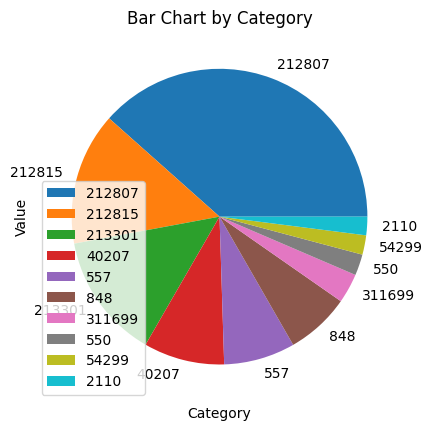

In [44]:
import matplotlib.pyplot as plt

values = products[(products['judge'] ==0) & products['MEMBER_ID'].isin(members[members['judge']==1]['MEMBER_ID'])]['CATEGORYM_ID'].value_counts().head(10)

# 막대 그래프 그리기
plt.pie(values.values, labels=values.index)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart by Category')
plt.legend()
plt.show()

# 이상회원인데 정상상품을 판 경우

In [45]:
len(products[(products['judge'] ==1) & products['MEMBER_ID'].isin(members[members['judge']==0]['MEMBER_ID'])])

128562

In [46]:
products[(products['judge'] ==1) & products['MEMBER_ID'].isin(members[members['judge']==0]['MEMBER_ID'])].head()

,MEMBER_ID,CATALOG_NM,CATEGORYM_ID,KEYWORD,DISPLAY,CATALOG_DESC,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,judge
212838,acmaertuui9213,Pamperings-Swaddlers-Baby-All-SIZES-1--2--3--4...,22020703,Pamperings-Swaddlers-Baby,1,CONTACT US TO PLACEORDERWhats-App: +1 (646)-83...,20230227,20230227,1561465943,3,1
212840,acmaertuui9213,The Ordinary Caffeine Solution 5 + Egcg 30ml O...,311699,The Ordinary Caffeine,1,CONTACT US TO PLACEORDERWhats-App: +1 (646)-83...,20230227,20230227,1561465943,3,1
212842,acmaertuui9213,OneTouch Ultra Glucose Diabetic Test Strips On...,311699,OneTouch Ultra Glucose,1,CONTACT US TO PLACEORDERWhats-App: +1 (646)-83...,20230227,20230227,1561465943,3,1
212843,acmaertuui9213,Sony-PlayStationning-PS5-Disc-Version-Bundle-V...,846,Sony-PlayStationning-PS5,1,CONTACT US TO PLACEORDERWhats-App: +1 (646)-83...,20230227,20230227,1561465943,3,1
212844,acmaertuui9213,Olaplexing Full Set 6 Piece Set - 1pc of Each ...,310902,Olaplexing Full Set,1,CONTACT US TO PLACEORDERWhats-App: +1 (646)-83...,20230227,20230227,1561465943,3,1


In [47]:
products[(products['judge'] ==1) & products['MEMBER_ID'].isin(members[members['judge']==0]['MEMBER_ID'])].value_counts()

MEMBER_ID       CATALOG_NM                                                                                            CATEGORYM_ID  KEYWORD                                                                          DISPLAY  CATALOG_DESC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [48]:
members[members['MEMBER_ID']=='xixapig794']

,MEMBER_ID,GUBUN,COUNTRY_CD,KEYWORD,LOGIN_DT,LOGIN_CNT,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,MTYPE,ORDER_FLG,judge,BLACK_LIST
14405,xixapig794,0,US,Ear Headphones,20200922,1,20200922,20200922,16112970184,0,0,90,0,0


# 이상회원인데 정상상품을 많이 판 카테고리

In [49]:
products[(products['judge'] ==1) & products['MEMBER_ID'].isin(members[members['judge']==0]['MEMBER_ID'])]['CATEGORYM_ID'].value_counts()

CATEGORYM_ID
821         16622
311699       9126
846          7657
612          5959
22020703     5194
            ...  
284101          1
833             1
250599          1
506             1
21404           1
Name: count, Length: 1656, dtype: int64

In [50]:
products[products['CATEGORYM_ID'] == 821]['CATALOG_NM'].value_counts()

CATALOG_NM
Buy 50 Get 10 Free Apple AirPods Pro 2nd Gen -Wireless Headset Bluetooth with Charging Case             2674
Order Apple AirPods Pro 2nd Gen - Wireless Headset Bluetooth Noise Canceling WhatsAp +1 862 339 9394    1050
Order Apple AirPods Pro 2nd Gen - Wireless Headset Bluetooth Noise Canceling WhatsAp +1 581 533 6718     889
Order 100% Authentic Brand New Apple AirPods Pro 2nd Gen-Wireless Bluetooth WhatsApp+1 862 339 9394      646
Apple AirPods Pro 2nd Gen -Wireless Headset Bluetooth with Charging Case WHATSAPP +1 (862) 339-9394      626
                                                                                                        ... 
Appls AirPods 2nd Generation with Charging                                                                 1
Apple AirPods Pro (MWP22AM/A) Wireless Bluetooth Headsets -                                                1
3rd Gen Appls Airpods                                                                                      1
Airpod 2

- 이상회원인데 정상상품을 가장 많이 판 카테고리는 821 이며, 기계류를 판매

In [51]:
products[products['CATALOG_DESC'].isna()].head()

,MEMBER_ID,CATALOG_NM,CATEGORYM_ID,KEYWORD,DISPLAY,CATALOG_DESC,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,judge
171250,woralak,Medical Disposable Protective 3-Ply Surgical F...,213301,surgical Face Mask,1,NaN,20200229,20200229,1714246252,2,0
191468,almaniosmans,Poloxamer 407 Chemicals Pharmaceuticals Auxi...,559,"poloxamer 407,Chemicals,Pharmaceuticals Auxili...",1,NaN,20181101,20181101,1852481277,2,0
259548,hopetool1129,Good Price 4 Axis CNC Router with High Z Axis,2673,4 Axis CNC Router,1,NaN,20220719,20220719,39919631,3,1
287554,honghui88,ASU 6C 12C CABLE ADSS Fiber Optic Cable Cable,3802,cable,1,NaN,20220311,20220311,391707582,3,1
316043,christopher657,Aston Martin V12 Vantage S 2016 GCC,306,automobile,1,NaN,20211203,20211203,8918716887,3,1


In [52]:
products[products['CATALOG_NM'].str.contains('kg')]

,MEMBER_ID,CATALOG_NM,CATEGORYM_ID,KEYWORD,DISPLAY,CATALOG_DESC,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,judge
3396,alizaskinnscarrd09,Royal Canin British Shorthair Wet Cat Food Pou...,3711,cat food,1,For quick responseContact us on:WhatsApp No: +...,20230215,20230215,165231253248,0,0
6799,tjm007,Aztec_Secret_Indian_Deep_Pore_Cleansing_Healin...,311699,Aztec Secret Indian,1,"TO PLACE AN ORDER WITH US, KINDLY CONTACT US V...",20230205,20230205,149182498,0,0
8982,mamsdistr55,LPG Cylinder 12.5kg Home Use Welding LPG Gas T...,1706,"Gas Tank for Sale,LPG Cylinder,LPG Gas Tank",1,"Standard ISO4706, ISO9001:2008, CE,NIS 69, DO...",20230129,20230208,12901028,0,0
11988,bbfdllc23,"Royal Canin Medium Puppy Pellet Dog Food,Chick...",3711,royal canin medium puppy,1,"To place an order with us ,kindly contact us v...",20230120,20230123,216131120175,0,0
11990,bbfdllc23,Wheat Flour Wheat Gluten 85% Food Grade Vital ...,2615,wheat flour,1,Product Name: Vital Wheat Gluten VWG Powder ...,20230120,20230123,216131120175,0,0
...,...,...,...,...,...,...,...,...,...,...,...
750188,229176121,3mm Dia X 3mm Thick Small Cylinder N42 Neodymi...,2819,"cylinder N42 magnet,3mm cylinder magnet,Small ...",1,Welcome to Shenzhen Zhenxing M...,20180103,20180103,18316205222,3,1
750226,miwami,Hanrabong Tea 1kg,1538,"tea,jam,beverage,marmalade",1,Hanrabong Tea Introduction : Hanrabong Tea...,20180103,20190622,143914997,3,1
750272,229176121,10mm Dia X 3mm Thick Nickel Coated N45 Neodymi...,2819,"10mm Dia magnet,3mm Thick magnet,Nickel Coated...",1,Welcome to Shenzhen Zhenxing M...,20180103,20180103,18316205222,3,1
750756,pvcvilw,Non Pasted Waterproof PVC Vinyl Wallpaper For ...,221110,"paper backed vinyl wallpaper,vinyl coated wall...",1,Specifications: Product name deep embosse...,20180102,20180102,11925430205,3,1


In [53]:
members[members['MEMBER_ID'] == 33333666]

,MEMBER_ID,GUBUN,COUNTRY_CD,KEYWORD,LOGIN_DT,LOGIN_CNT,INPUT_DT,UPDATE_DT,REMOTEIP,SHOW_CHK,MTYPE,ORDER_FLG,judge,BLACK_LIST
